In [18]:
library(ggplot2)
library(plotly)
library(minpack.lm)

In [19]:
#Table 18.2 from Ahmed, Tarek (2018) Reservoir Engineering Handbook
rate.data <- read.csv("REH_18.csv")
head(rate.data)

,DAYS,RATE
,<int>,<dbl>
1,1,2.3
2,2,3.0
3,3,3.2
4,4,3.0
5,5,3.2
6,6,4.2


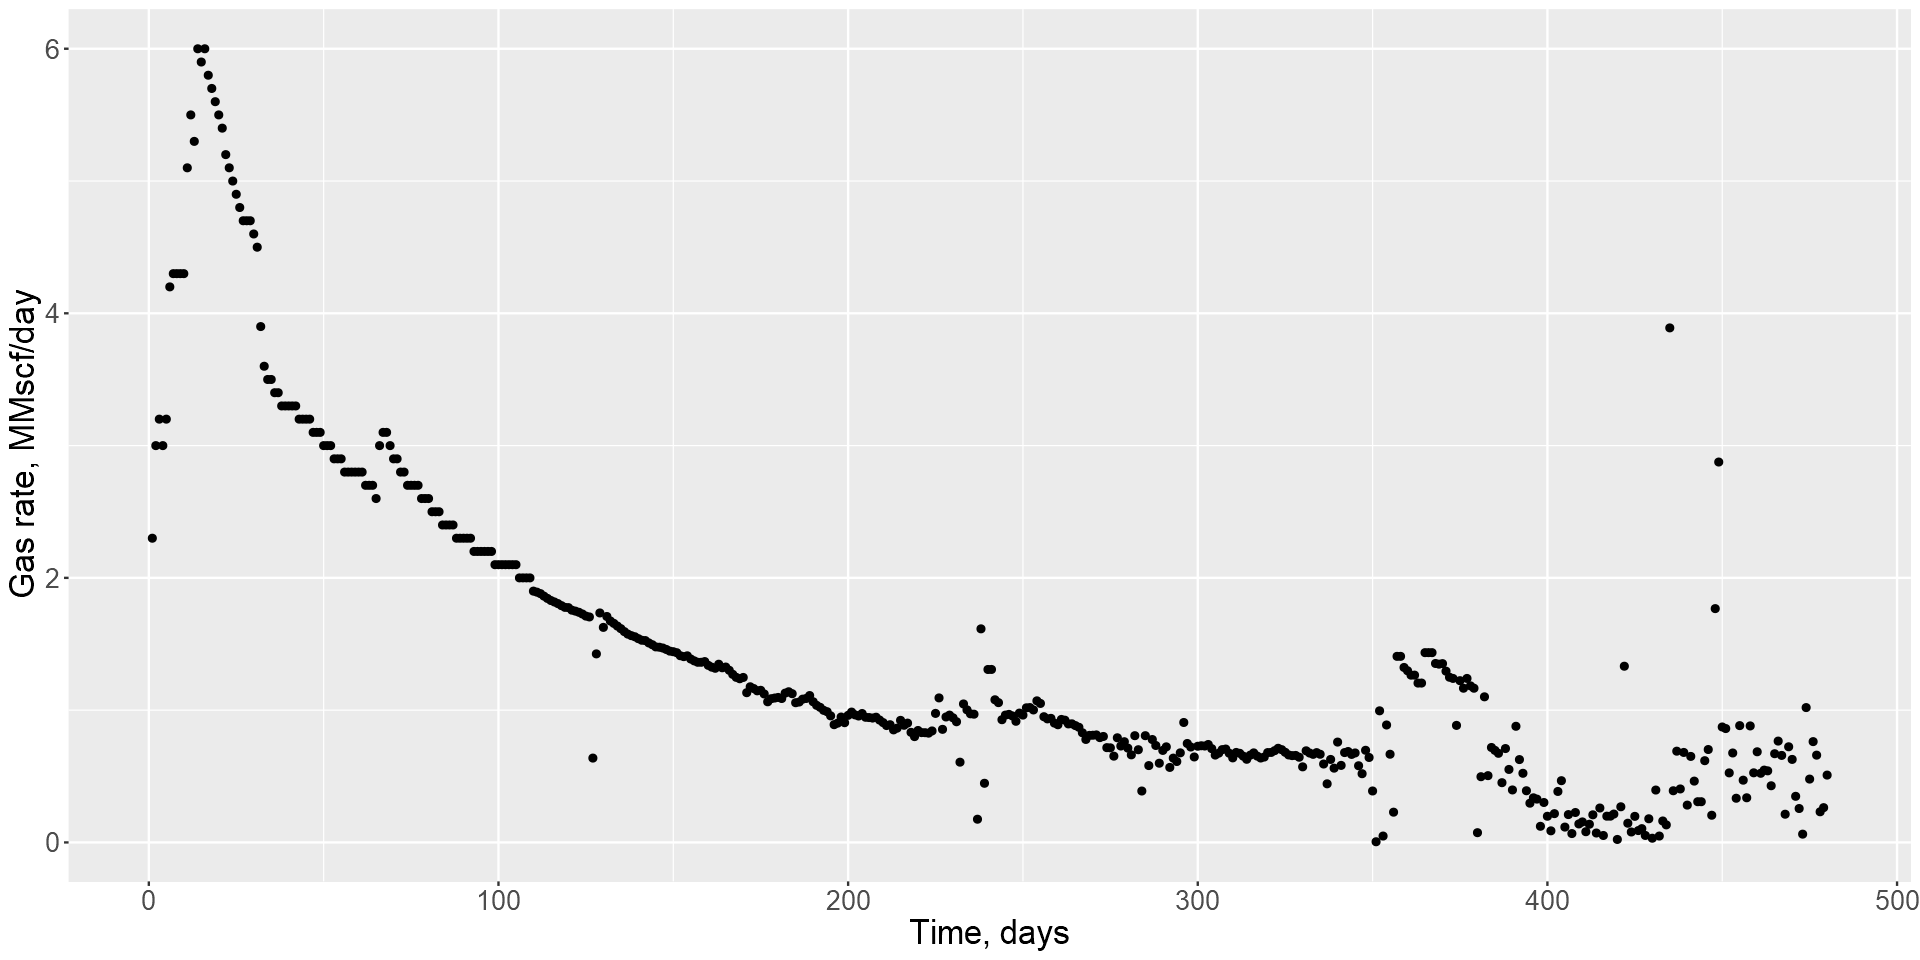

In [20]:
#plot gas rate
options(repr.plot.width=16, repr.plot.height=8)
ggplot(data = rate.data, aes(DAYS,RATE)) + geom_point() +
xlab("Time, days") + ylab("Gas rate, MMscf/day") +
theme(text = element_text(size=20))

$q_g = q_i t^{-m}exp[\frac{a}{1-m} (t^{1-m}-1)]$

In [21]:
#Match observed gas rate by nonlinear regression on "qi", "a" and "m" parameter from Doung model
#nlsLM from minpack.lm package use Levenberg-Marquardt fitting algorithm
dca.DUONG <- nlsLM(
  RATE ~ (qi.cal*DAYS^-m.cal)*exp((a.cal/(1-m.cal))*(DAYS^(1-m.cal)-1)),
  data = rate.data,
  start = list(
    qi.cal = 1,
    a.cal = 10,
    m.cal = 10
  )
)

print(dca.DUONG)

Nonlinear regression model
  model: RATE ~ (qi.cal * DAYS^-m.cal) * exp((a.cal/(1 - m.cal)) * (DAYS^(1 -     m.cal) - 1))
   data: rate.data
qi.cal  a.cal  m.cal 
0.5086 3.6367 1.3897 
 residual sum-of-squares: 63.25

Number of iterations to convergence: 21 
Achieved convergence tolerance: 1.49e-08


In [22]:
#Adjusted values
coefficients(dca.DUONG)

qi.cal    a.cal    m.cal 
0.508620 3.636749 1.389749

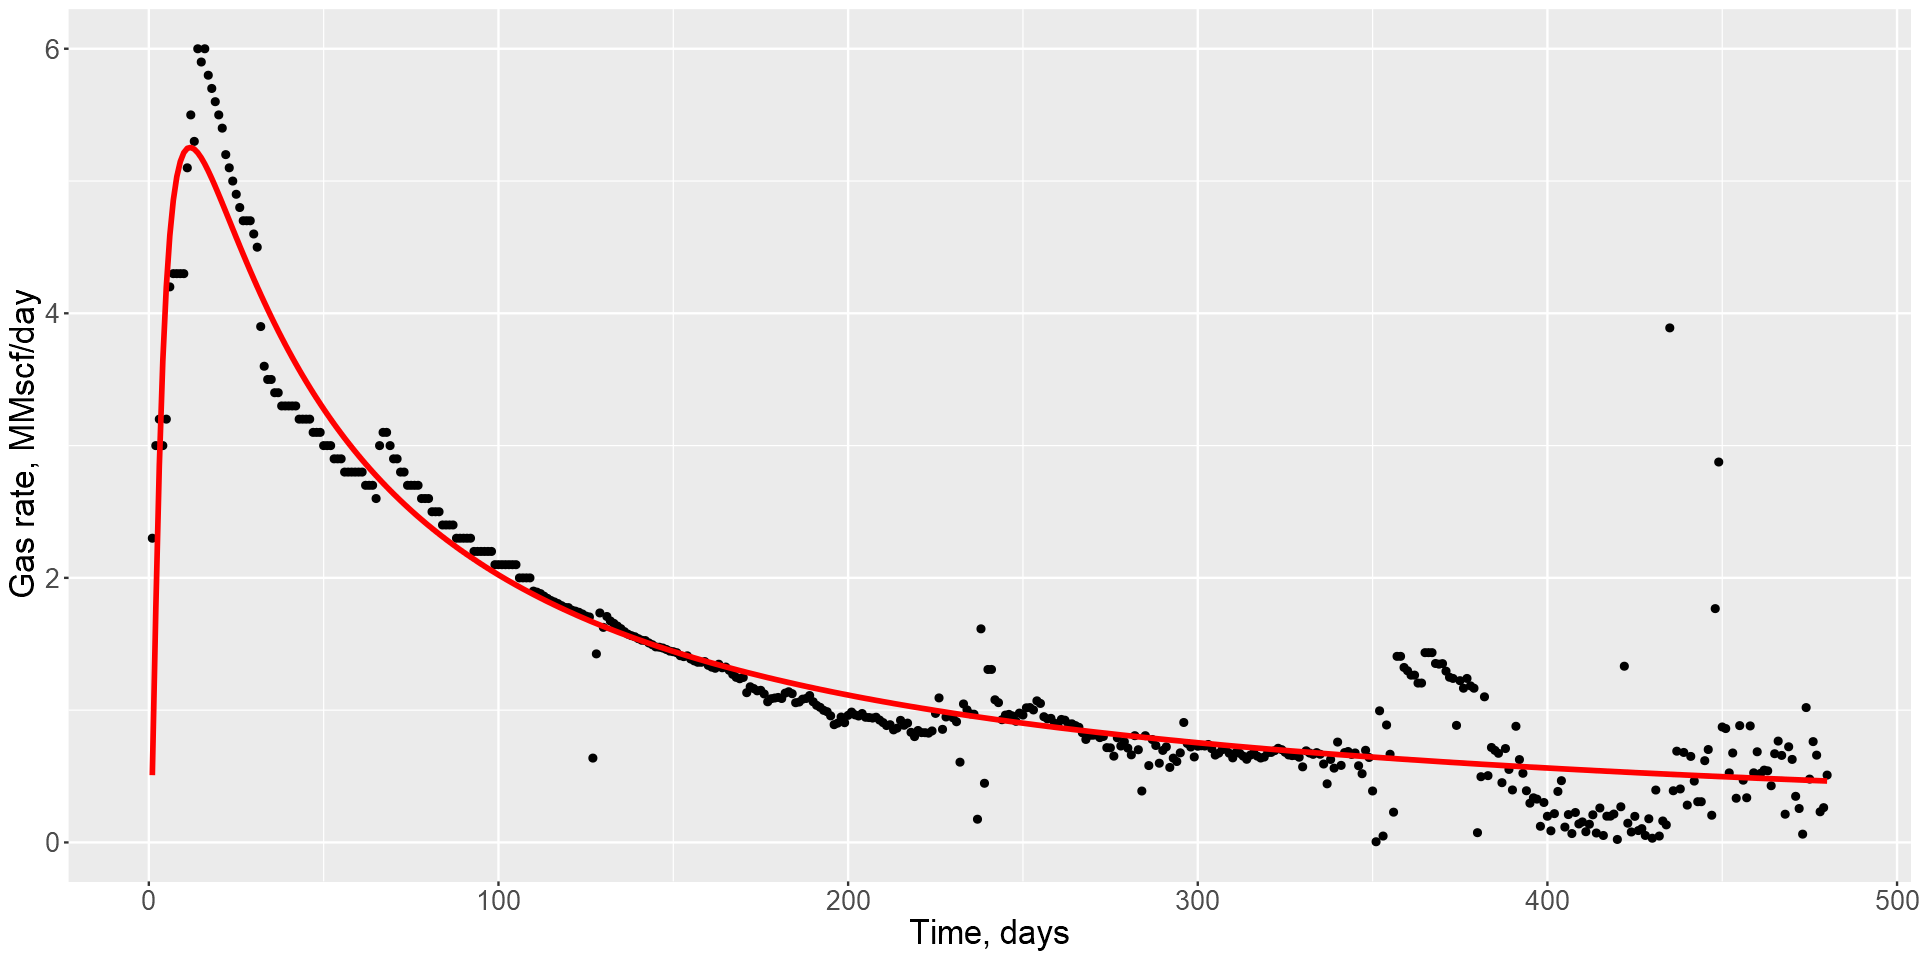

In [23]:
#Plot observed and fitted data
rate.data$RATE.pred <- fitted(dca.DUONG) 

  ggplot(data = rate.data, aes(DAYS,RATE)) + geom_point() +
  geom_line(aes(x = DAYS, y = RATE.pred), size = 1.2, color = "red") +
  xlab("Time, days") + ylab("Gas rate, MMscf/day") + 
  theme(text = element_text(size=20))